In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## All experiments

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


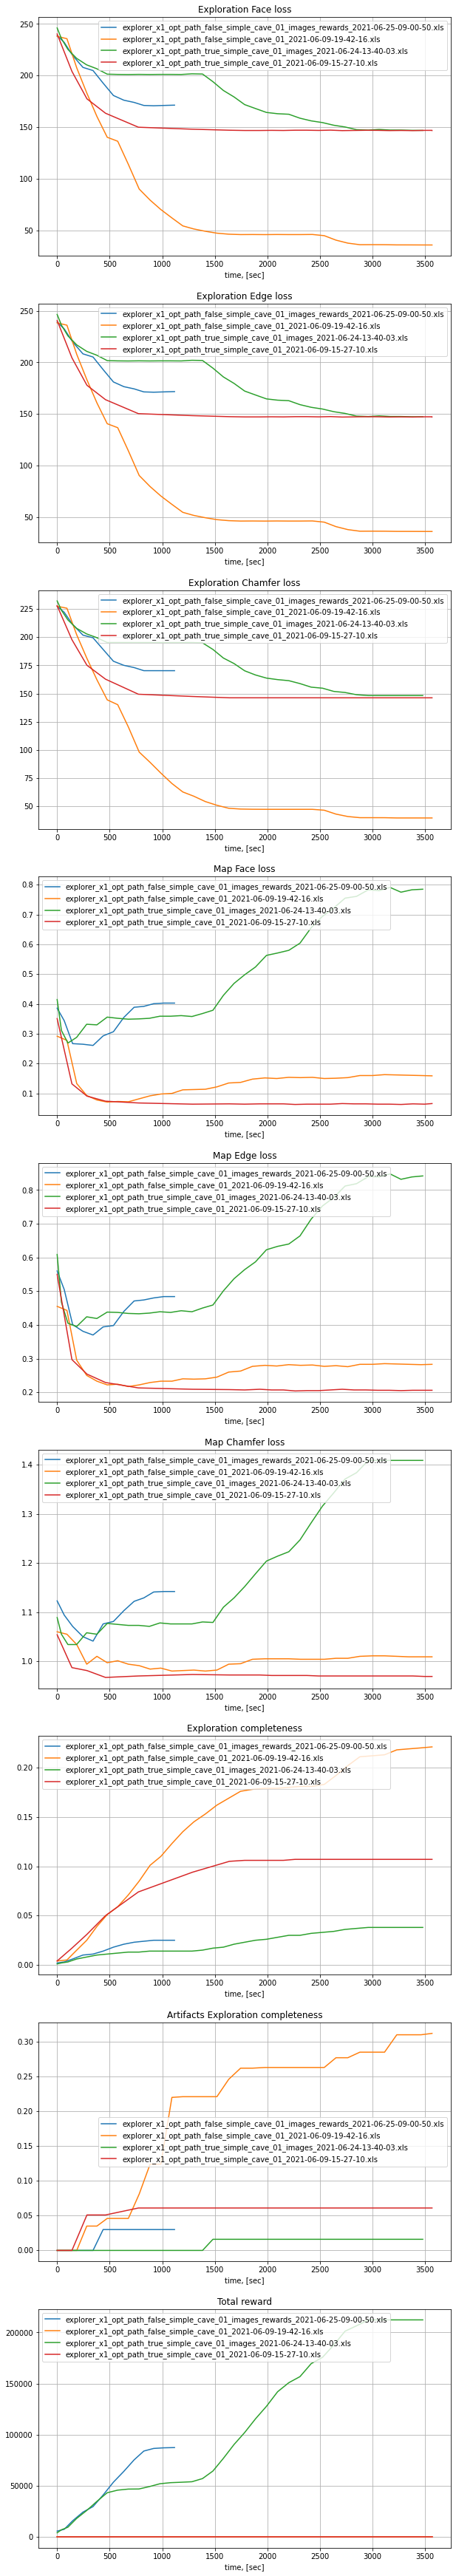

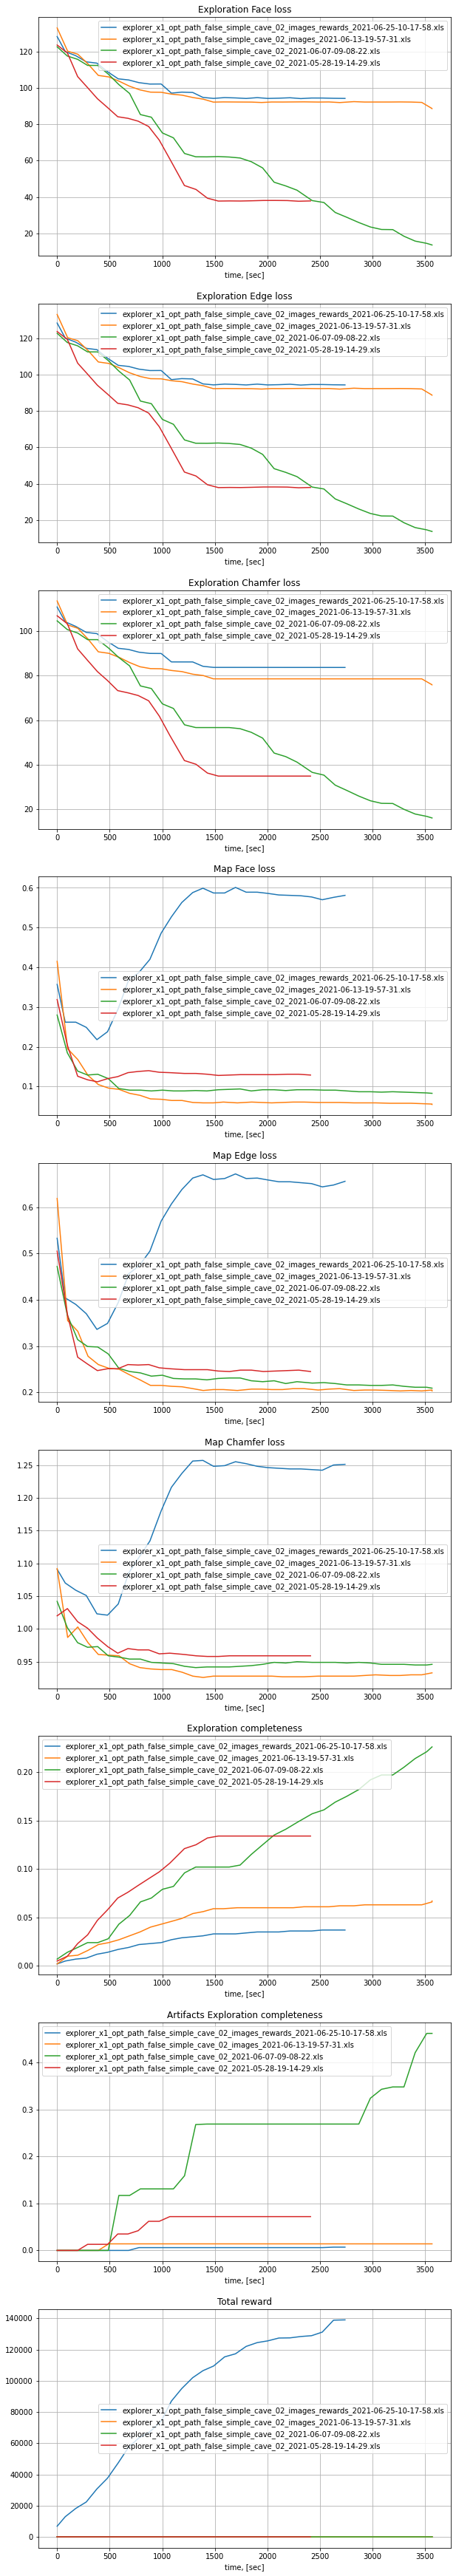

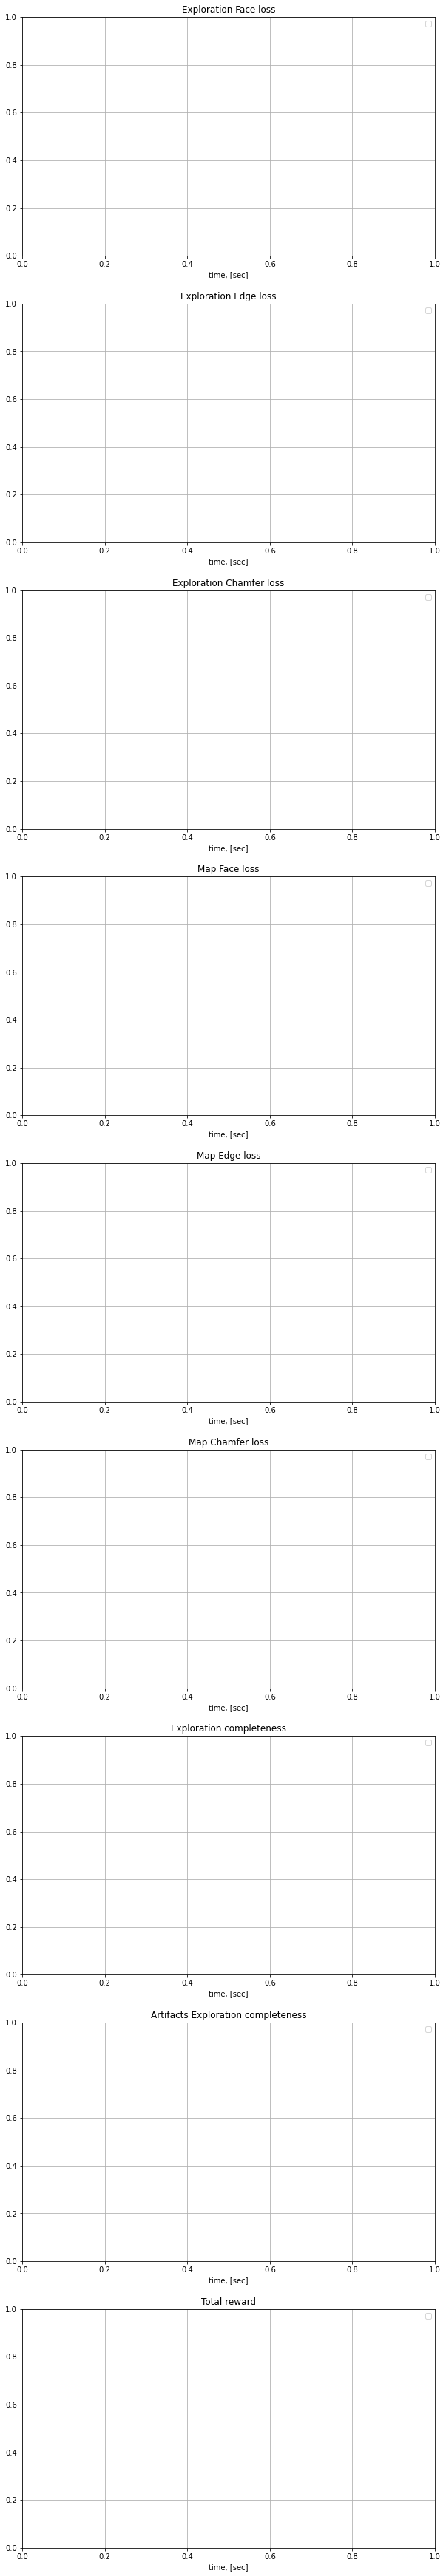

In [2]:
common_metrics = [
            "Exploration Face loss",
            "Exploration Edge loss",
            "Exploration Chamfer loss",
            "Map Face loss",
            "Map Edge loss",
            "Map Chamfer loss",
            "Exploration completeness",
            "Artifacts Exploration completeness",
#             "Detections score",
#             "N of constructed points"
            "Total reward"
          ]

worlds = ["simple_cave_01", "simple_cave_02", "simple_cave_03"]

PATH = '../data/bags/mapping_eval/'

for world in worlds:
    xls_files = [file for file in os.listdir(PATH) if 'xls' in file and world in file] # and 'opt_path_false' in file]

    plt.figure(figsize=(10, 7*len(common_metrics)))
    plt.title(f"World: {world}")
    for i, metric in enumerate(common_metrics):
        plt.subplot(len(common_metrics), 1, i+1)
        plt.title(metric)
        for file in xls_files:
            data = pd.read_excel(os.path.join(PATH, file))
            if metric in data:
                plt.plot(data['Time stamp'] - data['Time stamp'][0], data[metric], label=file)
        plt.grid()
        plt.xlabel('time, [sec]')
        plt.legend();

In [3]:
data.head()

,Time stamp,Exploration Face loss,Exploration Edge loss,Exploration Chamfer loss,Exploration completeness,Map Face loss,Map Edge loss,Map Chamfer loss,Artifacts Exploration completeness,Detections score,N of constructed points,Total reward
0,92.455130,123.543,123.633,106.868,0.005,0.319,0.505,1.020,0.000,0.0,25000,-1
1,189.945182,119.189,119.282,103.259,0.010,0.204,0.369,1.031,0.000,0.0,25000,-1
2,287.690302,106.182,106.254,91.994,0.023,0.126,0.276,1.011,0.000,0.0,25000,-1
3,382.616419,100.095,100.160,86.820,0.032,0.117,0.261,1.001,0.013,0.0,25000,-1
4,475.538231,94.048,94.103,81.824,0.047,0.112,0.247,0.986,0.013,0.0,25000,-1
